In [1]:
# Import pandas
import pandas as pd
import pytoolbox as ptb
import numpy as np

In [2]:
# Upload 'bike_rentals.csv' to dataFrame
df_bikes = pd.read_csv('bike_rentals.csv')

In [3]:
# omd
df_bikes.info()
df_bikes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1.0,1.0,12.0,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1.0,1.0,12.0,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1.0,1.0,12.0,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1.0,1.0,12.0,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
# omd
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,730.000000,731.000000,731.000000,731.000000,731.000000,730.000000,730.000000,728.000000,726.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500000,6.512329,0.028728,2.997264,0.682627,1.395349,0.495587,0.474512,0.627987,0.190476,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500343,3.448303,0.167155,2.004787,0.465773,0.544894,0.183094,0.163017,0.142331,0.077725,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.521562,0.134494,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180971,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730104,0.233218,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
# omd
# https://pbpython.com/groupby-agg.html 
def describe(df, stats):
    d = df.describe()
    return d.append(df.reindex(d.columns, axis = 1).agg(stats))

def percentile_25(x):
    return x.quantile(.25)

def percentile_50(x):
    return x.quantile(.50)

def count_nan(x):
    return x.size - x.count()

describe(df_bikes, [count_nan, 'skew', 'mad', 'kurt', 'mean', 'median', percentile_50, percentile_25])

/var/folders/pc/t6w9tgr112v1xdsjl9vggh6c0000gn/T/ipykernel_83888/3593841427.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return d.append(df.reindex(d.columns, axis = 1).agg(stats))


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,730.000000,731.000000,731.000000,731.000000,731.000000,730.000000,730.000000,728.000000,726.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500000,6.512329,0.028728,2.997264,0.682627,1.395349,0.495587,0.474512,0.627987,0.190476,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500343,3.448303,0.167155,2.004787,0.465773,0.544894,0.183094,0.163017,0.142331,0.077725,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.521562,0.134494,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180971,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730104,0.233218,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
count_nan,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000
skew,0.000000,-0.000384,0.000000,-0.007158,5.654224,0.002742,-0.786339,0.957385,-0.057161,-0.133559,-0.073978,0.676410,1.266454,0.043659,-0.047353


In [6]:
# omd
# vars = ['season', 'atemp', 'casual']
pd.pivot_table(df_bikes, index='season', aggfunc=['mean'])

mean                                                            \
           atemp       casual          cnt   holiday       hum     instant   
season                                                                       
1.0     0.296914   334.928177  2604.132597  0.038674  0.581498  262.685083   
2.0     0.520307  1106.097826  4992.331522  0.021739  0.627701  308.500000   
3.0     0.655898  1202.611702  5644.303191  0.021277  0.634243  401.500000   
4.0     0.415857   729.112360  4728.162921  0.033708  0.668719  493.000000   

                                                                         \
             mnth   registered      temp weathersit   weekday windspeed   
season                                                                    
1.0      3.044444  2269.204420  0.297748   1.408840  3.000000  0.214692   
2.0      4.652174  3886.233696  0.544405   1.402174  2.989130  0.203428   
3.0      7.691489  4441.691489  0.706309   1.297872  3.031915  0.172095   
4.0     10.696629  3999.050562  0.423332   1.477528  2.966292  0.172127   

                        
       workingday   yr  
season                  
1.0      0.657459  0.5  
2.0      0.695652  0.5  
3.0      0.696809  0.5  
4.0      0.679775  0.5

In [7]:
# omd
vars = ['season', 'holiday', 'weathersit']

print('Bike-count by specific variables:')
for i in vars:
    display(df_bikes.groupby([i])['cnt'].agg(['mean', 'median']).style.format('{0:,.0f}'))

Bike-count by specific variables:


,mean,median
season,,
1.000000,"2,604","2,209"
2.000000,"4,992","4,942"
3.000000,"5,644","5,354"
4.000000,"4,728","4,634"


,mean,median
holiday,,
0.000000,"4,527","4,558"
1.000000,"3,735","3,351"


,mean,median
weathersit,,
1,"4,877","4,844"
2,"4,036","4,040"
3,"1,803","1,817"


In [8]:
# omd

33699999
df_bikes[df_bikes['windspeed'].isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,NaN,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,NaN,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,NaN,664,3698,4362
298,299,2011-10-26,4.0,0.0,10.0,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,NaN,404,3490,3894
528,529,2012-06-12,2.0,1.0,6.0,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,NaN,477,4495,4972


In [9]:
# df_bikes[df_bikes['windspeed'].notna()]
df_bikes[df_bikes['windspeed'].notnull()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1.0,1.0,12.0,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1.0,1.0,12.0,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1.0,1.0,12.0,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1.0,1.0,12.0,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [10]:
# omd
# create a copy of the df_bikes dataset
df_bikes_copy = df_bikes.copy()

In [11]:
# omd
index_null_values = list(df_bikes[df_bikes.isnull().any(axis=1)].index)
index_null_values
display(df_bikes.iloc[index_null_values])
df_bikes.isna().sum()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,NaN,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,NaN,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,NaN,664,3698,4362
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,NaN,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,NaN,0.205850,801,4044,4845
298,299,2011-10-26,4.0,0.0,10.0,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,NaN,404,3490,3894
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,NaN,0.123767,439,3900,4339
528,529,2012-06-12,2.0,1.0,6.0,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,NaN,477,4495,4972
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649
730,731,2012-12-31,1.0,NaN,NaN,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


instant       0
dteday        0
season        0
yr            1
mnth          1
holiday       0
weekday       0
workingday    0
weathersit    0
temp          1
atemp         1
hum           3
windspeed     5
casual        0
registered    0
cnt           0
dtype: int64

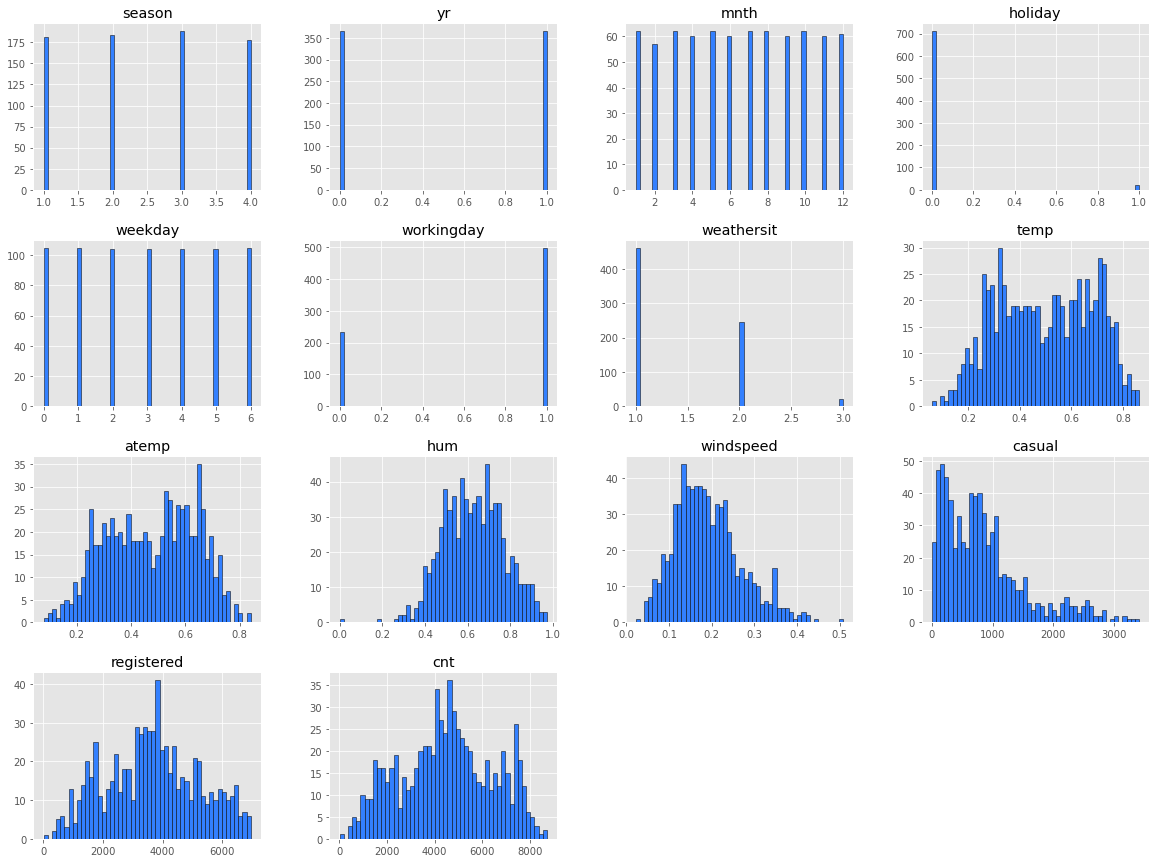

In [12]:
# omd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
df_bikes.loc[:, df_bikes.columns!='instant'].hist(bins=50, figsize=(20,15), ec='black', color='#3380FF')
plt.show()

In [13]:
# Display first 5 rows
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# omd
import numpy as np

df_bikes.agg(['count', 'mean', 'median']).style.format('{0:,.2f}')

/var/folders/pc/t6w9tgr112v1xdsjl9vggh6c0000gn/T/ipykernel_83888/957140282.py:4: FutureWarning: ['dteday'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_bikes.agg(['count', 'mean', 'median']).style.format('{0:,.2f}')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.00,730.00,730.00,731.00,731.00,731.00,731.00,730.00,730.00,728.00,726.00,731.00,731.00,731.00
mean,366.00,nan,2.50,0.50,6.51,0.03,3.00,0.68,1.40,0.50,0.47,0.63,0.19,848.18,"3,656.17","4,504.35"
median,366.00,nan,3.00,0.50,7.00,0.00,3.00,1.00,1.00,0.50,0.49,0.63,0.18,713.00,"3,662.00","4,548.00"


In [15]:
# Show df_bikes descriptive statistics
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,730.000000,731.000000,731.000000,731.000000,731.000000,730.000000,730.000000,728.000000,726.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500000,6.512329,0.028728,2.997264,0.682627,1.395349,0.495587,0.474512,0.627987,0.190476,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500343,3.448303,0.167155,2.004787,0.465773,0.544894,0.183094,0.163017,0.142331,0.077725,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.521562,0.134494,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180971,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730104,0.233218,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
# Display df_bikes info
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 91.5+ KB


In [17]:
# Sum null values
df_bikes.isna().sum().sum()

12

In [18]:
# Show null value in df_bikes
df_bikes[df_bikes.isna().any(axis=1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,NaN,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,NaN,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,NaN,664,3698,4362
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,NaN,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,NaN,0.205850,801,4044,4845
298,299,2011-10-26,4.0,0.0,10.0,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,NaN,404,3490,3894
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,NaN,0.123767,439,3900,4339
528,529,2012-06-12,2.0,1.0,6.0,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,NaN,477,4495,4972
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649
730,731,2012-12-31,1.0,NaN,NaN,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [19]:
# Fill windspeed null values with median
df_bikes['windspeed'].fillna((df_bikes['windspeed'].median()), inplace=True)

In [20]:
# Display rows 56 and 81
df_bikes.iloc[[56, 81]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,0.180971,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,0.180971,203,1918,2121


In [21]:
# omd
# sample of first 5; skip first column
df_bikes.iloc[0:5,1:]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
# Groupby season with median
df_bikes.groupby(['season']).median()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,
1.0,366.0,0.5,2.0,0.0,3.0,1.0,1.0,0.285833,0.282821,0.543750,0.202750,218.0,1867.0,2209.0
2.0,308.5,0.5,5.0,0.0,3.0,1.0,1.0,0.562083,0.538212,0.646667,0.191546,867.0,3844.0,4941.5
3.0,401.5,0.5,8.0,0.0,3.0,1.0,1.0,0.714583,0.656575,0.635833,0.165115,1050.5,4110.5,5353.5
4.0,493.0,0.5,11.0,0.0,3.0,1.0,1.0,0.410000,0.409708,0.661042,0.167918,544.5,3815.0,4634.5


In [23]:
# Convert 'hum' null values to median of season
df_bikes['hum'] = df_bikes['hum'].fillna(df_bikes.groupby('season')['hum'].transform('median'))

In [24]:
# Show null values of 'temp' column
df_bikes[df_bikes['temp'].isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649


In [25]:
# Compute mean temp and atemp by row
mean_temp = (df_bikes.iloc[700]['temp'] + df_bikes.iloc[702]['temp'])/2
mean_atemp = (df_bikes.iloc[700]['atemp'] + df_bikes.iloc[702]['atemp'])/2

# Replace null values with mean temperatures
df_bikes['temp'].fillna((mean_temp), inplace=True)
df_bikes['atemp'].fillna((mean_atemp), inplace=True)

In [26]:
# Convert 'dteday' to datetime object
df_bikes['dteday'] = pd.to_datetime(df_bikes['dteday'])

In [35]:
# omd
df_bikes_copy = df_bikes_copy.drop(['dteday','casual', 'registered'], axis=1)

In [27]:
df_bikes['dteday'].apply(pd.to_datetime, infer_datetime_format=True, errors='coerce')

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

In [28]:
# Import datetime
import datetime as dt

In [29]:
df_bikes['mnth'] = df_bikes['dteday'].dt.month

In [37]:
# Show last 5 rows
df_bikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1.0,1.0,12,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1.0,1.0,12,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1.0,1.0,12,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1.0,NaN,12,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [38]:
# Change row 730, column 'yr' to 1.0
df_bikes.loc[730, 'yr'] = 1.0

In [39]:
# Show last 5 rows
df_bikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1.0,1.0,12,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1.0,1.0,12,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1.0,1.0,12,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1.0,1.0,12,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [40]:
# omd
x = df_bikes.copy()

In [41]:
# omd
x['year_mod'] = x['dteday'].dt.year

In [42]:
# omd
pd.crosstab(x.year_mod, x.yr)

yr,0.0,1.0
year_mod,,
2011,365,0
2012,0,366


In [43]:
# omd
x.yr.value_counts()

1.0    366
0.0    365
Name: yr, dtype: int64

In [ ]:
# Drop 'dteday' column
df_bikes = df_bikes.drop('dteday', axis=1)

In [ ]:
# Drop 'casual', 'registered' columns
df_bikes = df_bikes.drop(['casual', 'registered'], axis=1)

In [ ]:
# Export 'bike_rentals_cleaned' csv file
df_bikes.to_csv('bike_rentals_cleaned.csv', index=False)

In [ ]:
# Split data into X and y
X = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
# Silence warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Initialize LinearRegression model
lin_reg = LinearRegression()

# Fit lin_reg on training data
lin_reg.fit(X_train, y_train)

# Predict X_test using lin_reg
y_pred = lin_reg.predict(X_test)

# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Import numpy
import numpy as np

# Compute mean_squared_error as mse
mse = mean_squared_error(y_test, y_pred)

# Compute root mean squared error as rmse
rmse = np.sqrt(mse)

# Display root mean squared error
print("RMSE: %0.2f" % (rmse))

In [ ]:
# Display bike rental stats
df_bikes['cnt'].describe()

In [ ]:
# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the XGBRegressor, xg_reg
xg_reg = XGBRegressor()

# Fit xg_reg to training set
xg_reg.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xg_reg.predict(X_test)

# Compute the mean_squared_error, mse
mse = mean_squared_error(y_test, y_pred)

# Compute the root mean squared error, rmse
rmse = np.sqrt(mse)

# Display the root mean squared error
print("RMSE: %0.2f" % (rmse))

In [ ]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate Linear Regression
model = LinearRegression()

# Obtain scores of cross-validation using 10 splits and mean squared error
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

# Take square root of the scores
rmse = np.sqrt(-scores)

# Display root mean squared error
print('Reg rmse:', np.round(rmse, 2))

# Display mean score
print('RMSE mean: %0.2f' % (rmse.mean()))

In [ ]:
# Instantiate XGBRegressor
model = XGBRegressor(objective="reg:squarederror")

# Obtain scores of cross-validation using 10 splits and mean squared error
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

# Take square root of the scores
rmse = np.sqrt(-scores)

# Display root mean squared error
print('Reg rmse:', np.round(rmse, 2))

# Display mean score
print('RMSE mean: %0.2f' % (rmse.mean()))

# Machine Learning - Classification

In [ ]:
# Upload Census dataset (adult) from UCI Machine Learning Repository
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

# Display first 5 rows
df_census.head()

In [ ]:
# Upload Census dataset with no header
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# Display first 5 rows
df_census.head()

In [ ]:
# Define df_census columns
df_census.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   'income']

# Display first 5 rows
df_census.head()

In [ ]:
# Display df_census info
df_census.info()

In [ ]:
# Drop education column
df_census = df_census.drop(['education'], axis=1)

In [ ]:
# Convert non-numeric columns using get_dummies
df_census = pd.get_dummies(df_census)

# Display first 5 rows
df_census.head()

In [ ]:
# Drop column 'income_ <=50K'
df_census = df_census.drop('income_ <=50K', axis=1)

In [ ]:
# Split data into X and y
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

In [ ]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Define cross_val function with classifer and num_splits as input
def cross_val(classifier, num_splits=10):
    
    # Initialize classifier
    model = classifier

    # Obtain scores of cross-validation
    scores = cross_val_score(model, X, y, cv=num_splits)

    # Display accuracy
    print('Accuracy:', np.round(scores, 2))

    # Display mean accuracy
    print('Accuracy mean: %0.2f' % (scores.mean()))

In [ ]:
# Use cross_val function to score LogisticRegression
cross_val(LogisticRegression())

In [ ]:
# Import XGBoost Classifier
from xgboost import XGBClassifier

In [ ]:
# Use cross_val function to score XGBoost
cross_val(XGBClassifier(n_estimators=5))